In [4]:
using NCDatasets
using PhysOcean
using DIVAnd
using PyPlot
using Dates

In [5]:
datadir = "/data/SeaDataCloud/NorthSea/"
figdir = "/home/ctroupin/Projects/SeaDataCloud/Julia/Climatologies/NorthSea/figures/"

"/home/ctroupin/Projects/SeaDataCloud/Julia/Climatologies/NorthSea/figures/"

In [6]:
datafile1 = joinpath(datadir, "NorthSea_obs_temperature.nc")
datafile2 = joinpath(datadir, "NorthSea_obs_temperature_wod.nc")
isfile(datafile1) & isfile(datafile2)

true

In [7]:
@time obsvalSDN, obslonSDN, obslatSDN, obsdepthSDN, obstimeSDN, obsidSDN = 
DIVAnd.loadobs(Float64,datafile1,"Temperature");

 13.097364 seconds (30.20 M allocations: 7.515 GiB, 14.98% gc time)


In [8]:
@time obsvalWOD, obslonWOD, obslatWOD, obsdepthWOD, obstimeWOD, obsidWOD = 
DIVAnd.loadobs(Float64,datafile2,"Temperature");

  0.333613 seconds (2.24 M allocations: 238.936 MiB)


In [10]:
yearsSDN = Dates.year.(obstimeSDN);
yearsWOD = Dates.year.(obstimeWOD);

In [11]:
extrema(yearsWOD)

(1955, 2014)

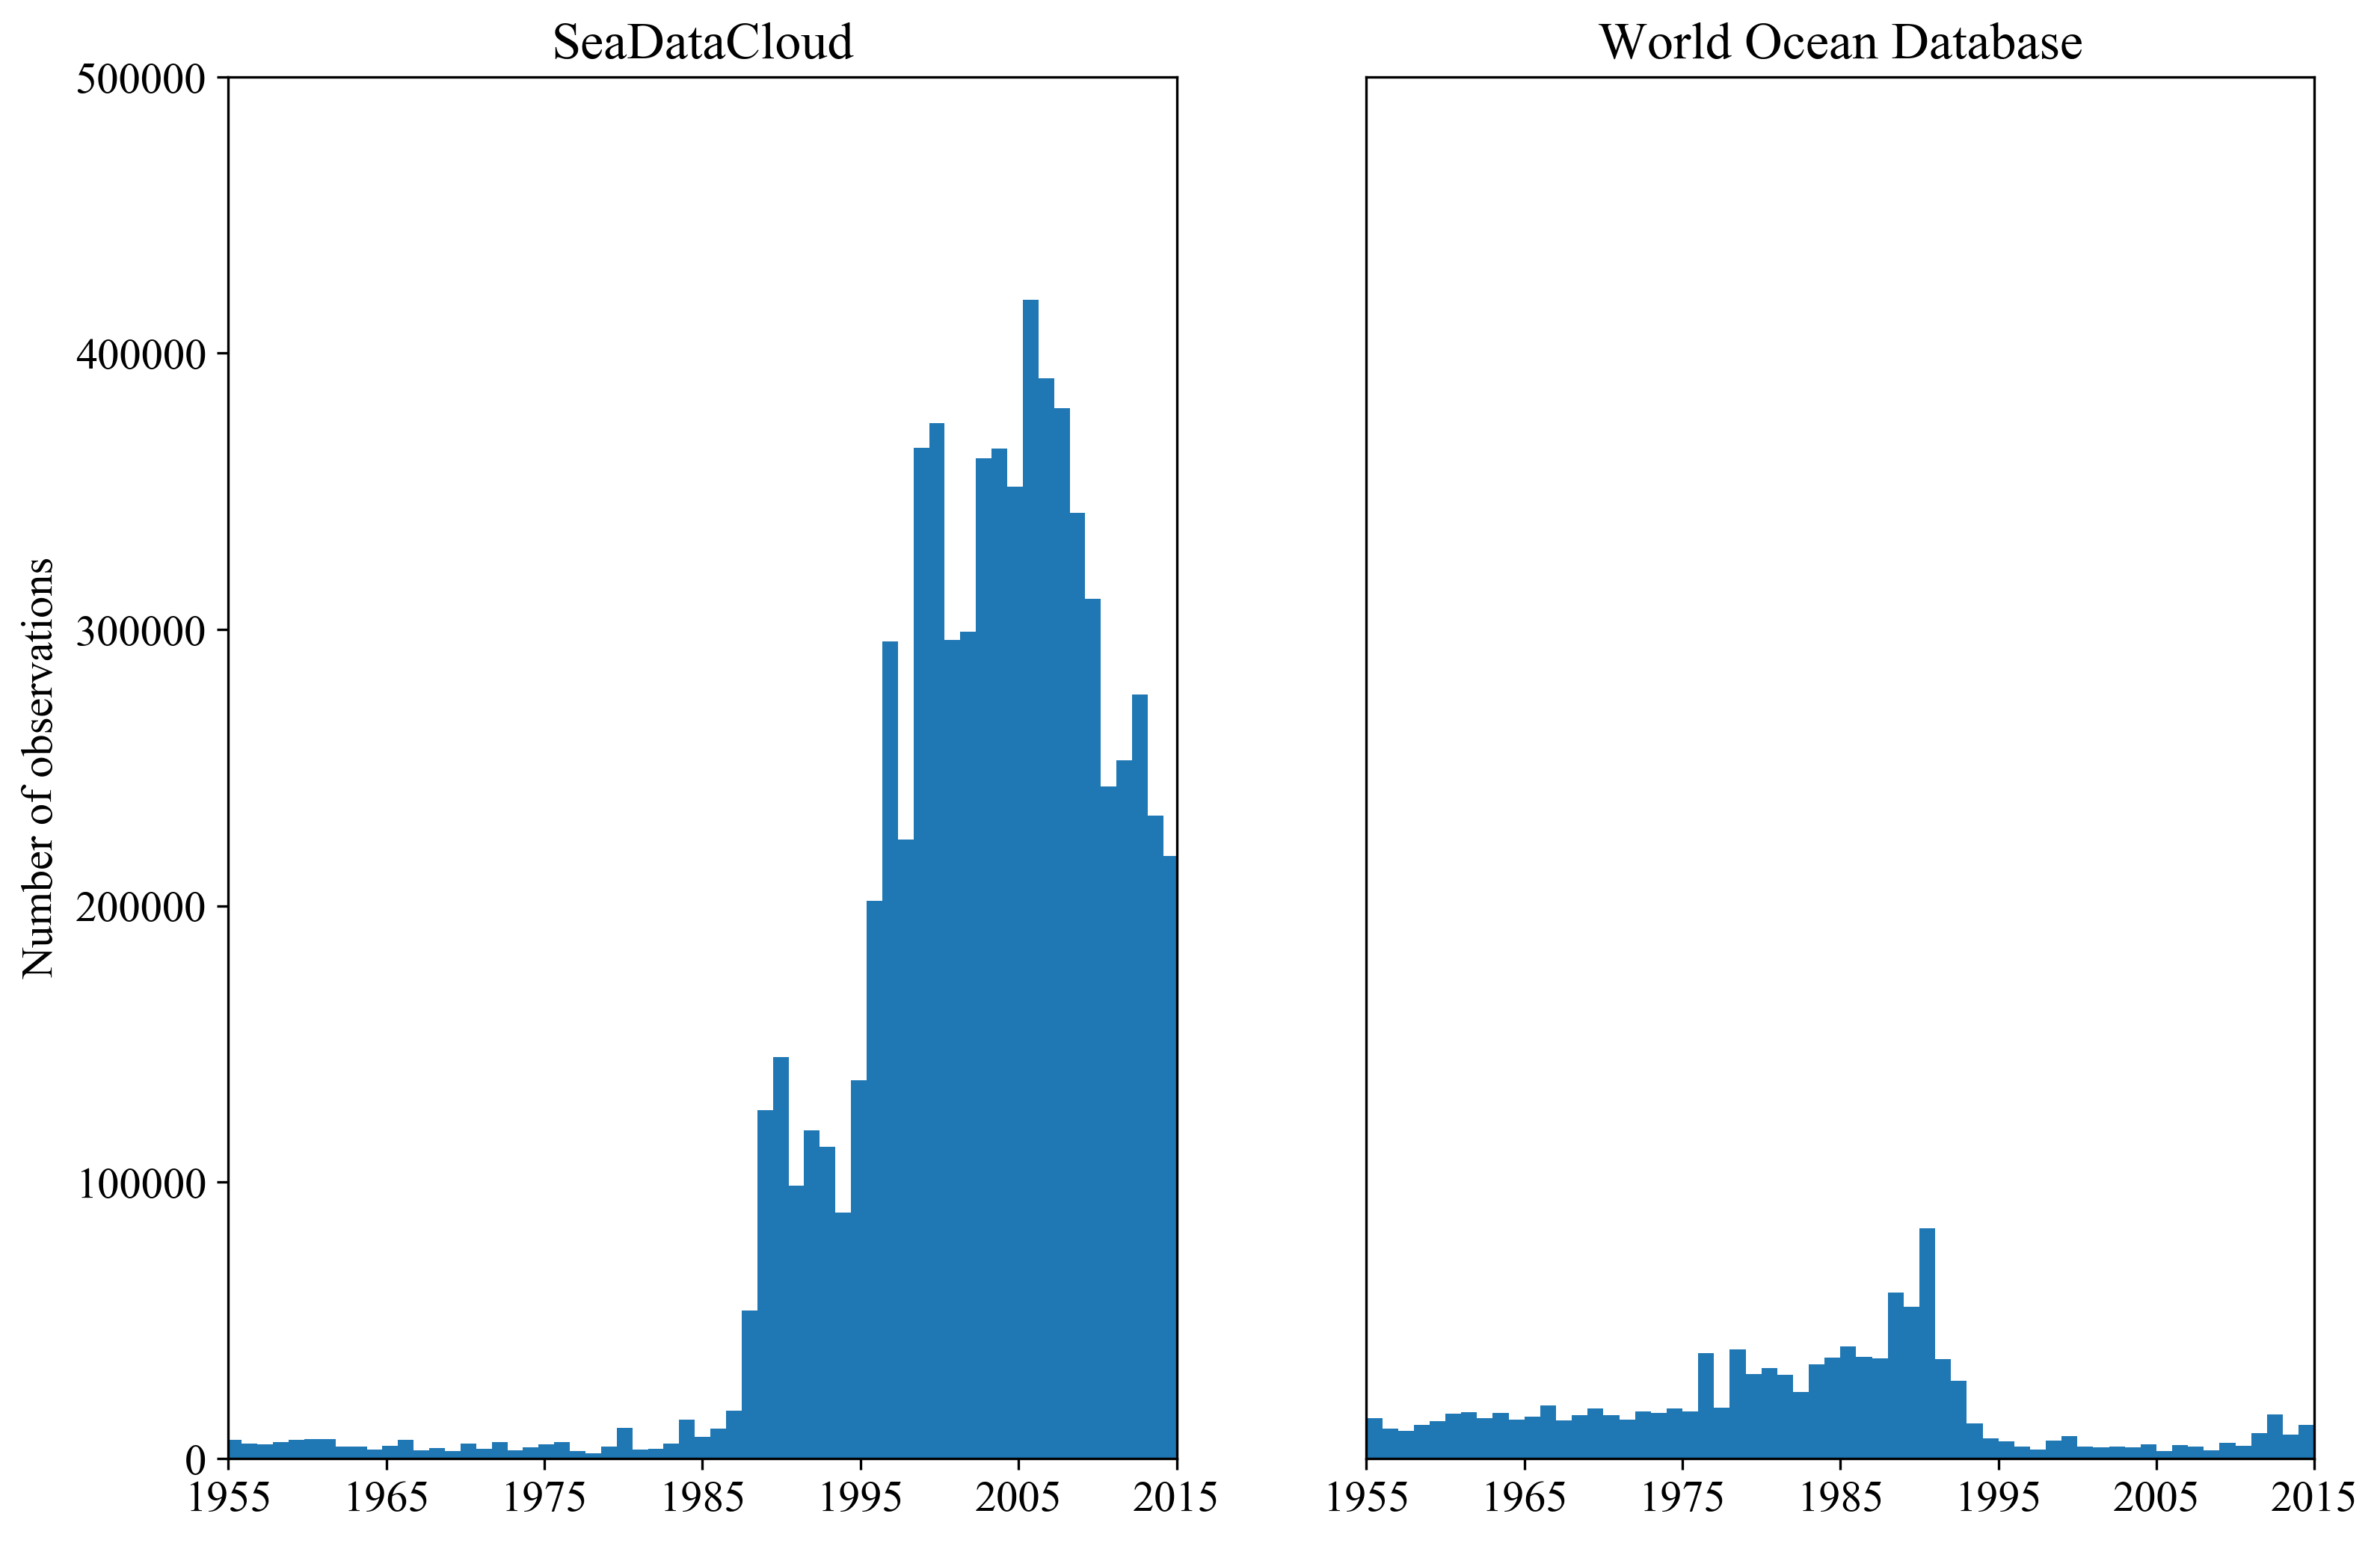

In [12]:
ymax=500000
PyPlot.figure(figsize=(12, 8))
PyPlot.subplot(121)
PyPlot.hist(obstimeSDN, bins = maximum(yearsSDN) - minimum(yearsSDN) + 1)
xlim(DateTime(1955,1,1), DateTime(2015,1,1))
ylim(0, ymax)
ylabel("Number of observations")
title("SeaDataCloud")
PyPlot.subplot(122)
PyPlot.hist(obstimeWOD, bins = maximum(yearsWOD) - minimum(yearsWOD) + 1)
xlim(DateTime(1955,1,1), DateTime(2015,1,1))
ylim(0, ymax)
yticks([])
title("World Ocean Database")
savefig(joinpath(figdir, "histogram_SDC_WOD2.png"), dpi=300, bbox_inches="tight")

In [13]:
@show length(obstimeSDN)
@show length(unique(obstimeSDN))

length(obstimeSDN) = 7813305
length(unique(obstimeSDN)) = 131543


131543

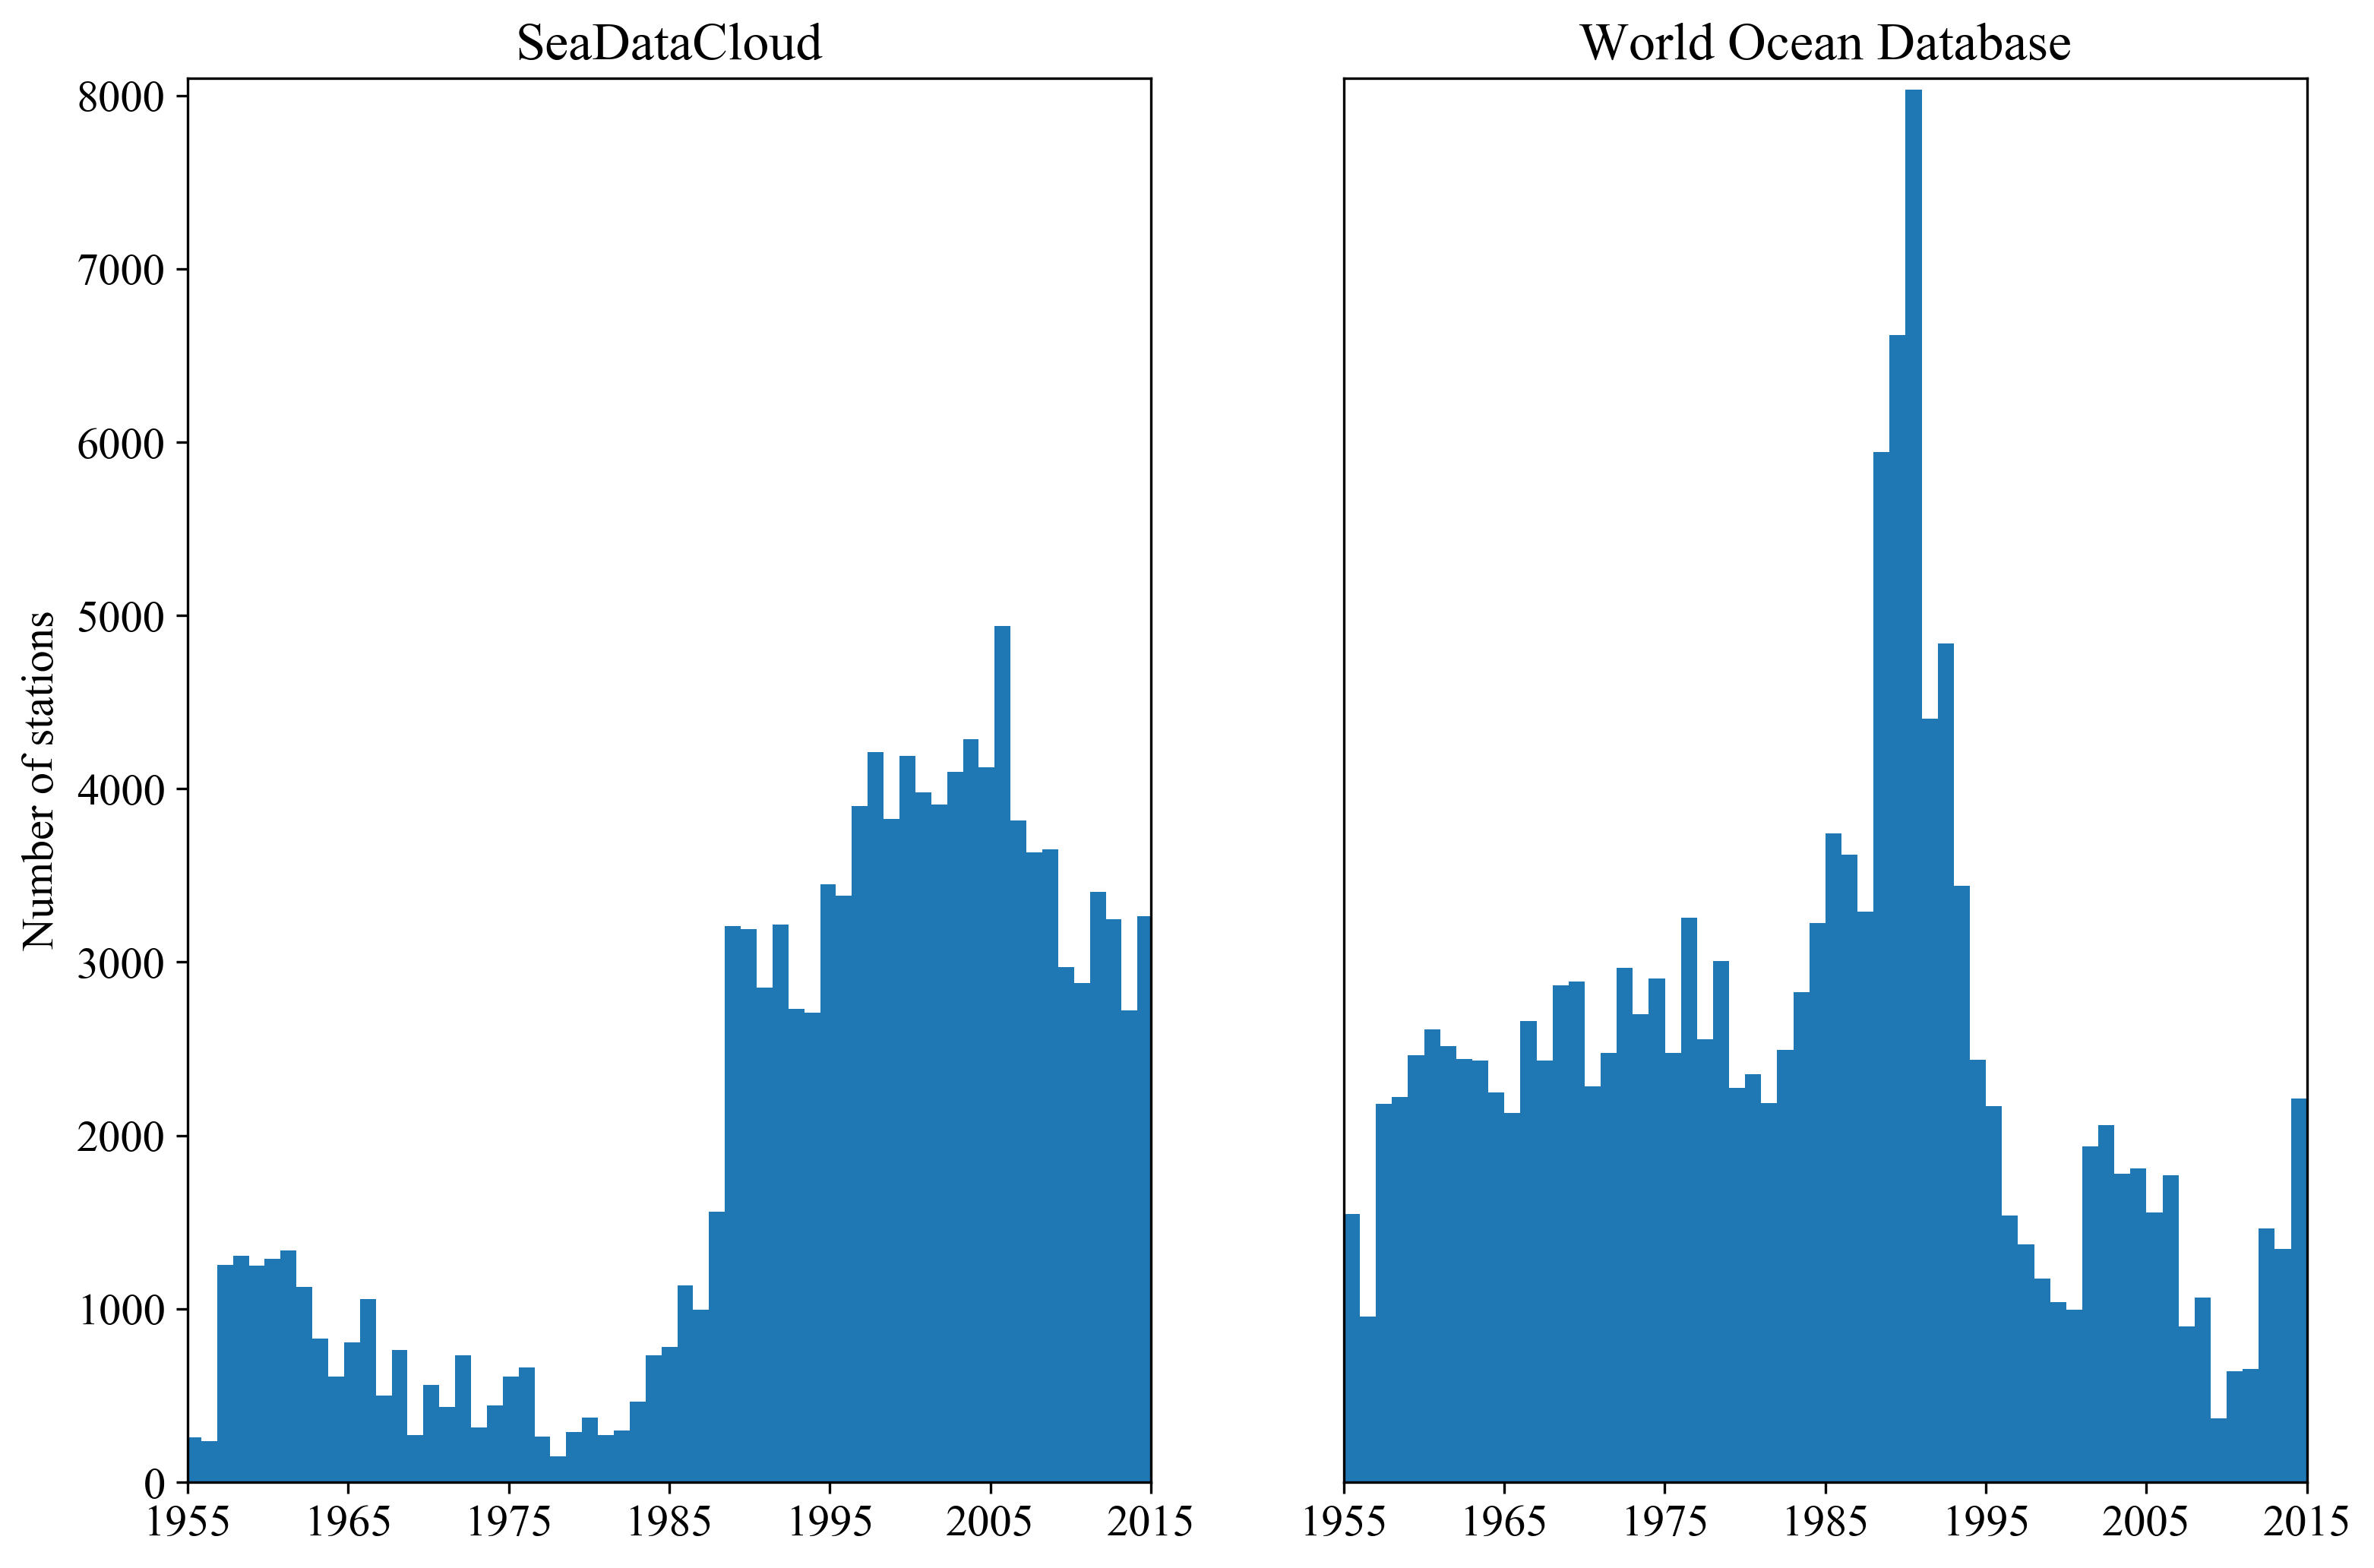

In [15]:
ymax2 = 8100
PyPlot.figure(figsize=(12, 8))
PyPlot.subplot(121)
PyPlot.hist(unique(obstimeSDN), bins = maximum(yearsSDN) - minimum(yearsSDN) + 1)
xlim(DateTime(1955,1,1), DateTime(2015,1,1))
ylim(0, ymax2)
ylabel("Number of stations")
title("SeaDataCloud")
PyPlot.subplot(122)
PyPlot.hist(unique(obstimeWOD), bins = maximum(yearsWOD) - minimum(yearsWOD) + 1)
xlim(DateTime(1955,1,1), DateTime(2015,1,1))
ylim(0, ymax2)
yticks([])
title("World Ocean Database")
savefig(joinpath(figdir, "histogram_SDC_WOD_stations.png"), dpi=300, bbox_inches="tight")

In [19]:
PyPlot.figure(figsize=(12, 8))
PyPlot.hist([unique(obstimeSDN), unique(obstimeWOD)], 
    stacked=true,
    bins = maximum(yearsSDN) - minimum(yearsSDN) + 1)
#xlim(DateTime(1955,1,1), DateTime(2015,1,1))
ylim(0, ymax2)
ylabel("Number of stations")
#title("SeaDataCloud")
#title("World Ocean Database")
#savefig(joinpath(figdir, "histogram_SDC_WOD_stations.png"), dpi=300, bbox_inches="tight")

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/ctroupin/.julia/packages/PyCall/ttONZ/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'TypeError'>
TypeError("'<' not supported between instances of 'datetime.datetime' and 'float'",)
  File "/home/ctroupin/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py", line 3004, in hist
    stacked=stacked, normed=normed, data=data, **kwargs)
  File "/home/ctroupin/miniconda3/lib/python3.6/site-packages/matplotlib/__init__.py", line 1710, in inner
    return func(ax, *args, **kwargs)
  File "/home/ctroupin/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py", line 6193, in hist
    xmin = min(xmin, xi.min())
